In [6]:
# import packages
import pandas as pd
import numpy as np
import statsmodels.api
import matplotlib as plt
import matplotlib.pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import *

In [1]:
# data read
raw_train = pd.read_csv("~/hosthome/fc_team_project2/datasets/UJIIndoorLoc/trainingData.csv")
raw_validation = pd.read_csv("~/hosthome/fc_team_project2/datasets/UJIIndoorLoc/validationData.csv")

In [2]:
raw_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [3]:
raw_validation.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


---

In [4]:
# normalization_1
nor_train = (raw_train.iloc[:, 0:520]-1)/(-105)
nor_train[nor_train == -0.9428571428571428] = 0
nor_train = nor_train.join(raw_train.iloc[:, 520:])

nor_validation = (raw_validation.iloc[:, 0:520]-1)/(-105)
nor_validation[nor_validation == -0.9428571428571428] = 0
nor_validation = nor_validation.join(raw_validation.iloc[:, 520:])

In [2]:
# normalization_2
nor_train = raw_train.iloc[:, 0:520]/(-104)
nor_train[nor_train == -0.9615384615384616] = 0
nor_train = nor_train.join(raw_train.iloc[:, 520:])

nor_validation = raw_validation.iloc[:, 0:520]/(-104)
nor_validation[nor_validation == -0.9615384615384616] = 0
nor_validation = nor_validation.join(raw_validation.iloc[:, 520:])

---

In [ ]:
# set display option
pd.set_option('display.float_format', lambda x: '%.3f' % x)

---

In [5]:
# one-hot-encoding train & test data
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(dtype=int)

train_c = raw_train.loc[:, ("FLOOR", "BUILDINGID")].values
train_c_e = ohe.fit(train_c)
train_c = train_c_e.transform(train_c).toarray()
train_c = pd.DataFrame(train_c)

validation_c = raw_validation.loc[:, ("FLOOR", "BUILDINGID")].values
validation_c = train_c_e.transform(validation_c).toarray()
validation_c = pd.DataFrame(validation_c)

---

In [48]:
# train_1
##train_y = nor_train["LONGITUDE"]
train_y = nor_train.loc[:, ("LONGITUDE", "LATITUDE")]
train_x = nor_train.iloc[:, 0:520]
train_x = train_x.join(train_c)
##train_x = sm.add_constant(train_x)

model_1 = sm.OLS(train_y, train_x).fit()


In [70]:
# test_1
validation_x = nor_validation.iloc[:, 0:520]
validation_x = validation_x.join(validation_c)
##validation_x = sm.add_constant(validation_x)

validation_y = model_1.predict(validation_x)
validation_y.head()

,0,1
0,-7477.431292,4.864884e+06
1,-7363.466480,4.864843e+06
2,-7367.805800,4.864840e+06
3,-7354.912291,4.864841e+06
4,-7635.897738,4.864923e+06


In [9]:
raw_validation.loc[:, ("LONGITUDE", "LATITUDE")].head()

,LONGITUDE,LATITUDE
0,-7515.917,4864889.663
1,-7383.867,4864839.740
2,-7374.302,4864846.534
3,-7365.825,4864842.829
4,-7641.499,4864922.399


In [16]:
len(model_1.fittedvalues.iloc[:, 1])

19937

In [18]:
len(raw_train["LONGITUDE"])

19937

---

In [62]:
aa = pd.DataFrame(validation_y)
aa.head()
validation_y

,LONGITUDE_pre,LATITUDE_pre
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [74]:
# GAP
validation_y = validation_y.rename(columns={0:"LONGITUDE_pre", 1:"LATITUDE_pre"})

result = validation_y.join(raw_validation.loc[:, ("LONGITUDE", "LATITUDE")])
result["LONG_Gap"] = raw_validation.loc[:, "LONGITUDE"] - validation_y.loc[:, "LONGITUDE_pre"]
result["LAT_Gap"] = raw_validation.loc[:, "LATITUDE"] - validation_y.loc[:, "LATITUDE_pre"]
result

,LONGITUDE_pre,LATITUDE_pre,LONGITUDE,LATITUDE,LONG_Gap,LAT_Gap
0,-7477.431292,4.864884e+06,-7515.916799,4.864890e+06,-38.485507,6.080959
1,-7363.466480,4.864843e+06,-7383.867221,4.864840e+06,-20.400741,-3.460043
2,-7367.805800,4.864840e+06,-7374.302080,4.864847e+06,-6.496280,6.320273
3,-7354.912291,4.864841e+06,-7365.824883,4.864843e+06,-10.912591,1.685973
4,-7635.897738,4.864923e+06,-7641.499303,4.864922e+06,-5.601565,-1.065528
5,-7314.738921,4.864821e+06,-7338.807210,4.864825e+06,-24.068289,4.565935
6,-7360.963872,4.864848e+06,-7379.351683,4.864849e+06,-18.387811,1.159725
7,-7363.969027,4.864779e+06,-7340.558777,4.864759e+06,23.410250,-19.768112
8,-7358.989163,4.864778e+06,-7357.531253,4.864766e+06,1.457910,-12.179656
9,-7344.167951,4.864824e+06,-7345.085170,4.864831e+06,-0.917219,7.043946


---

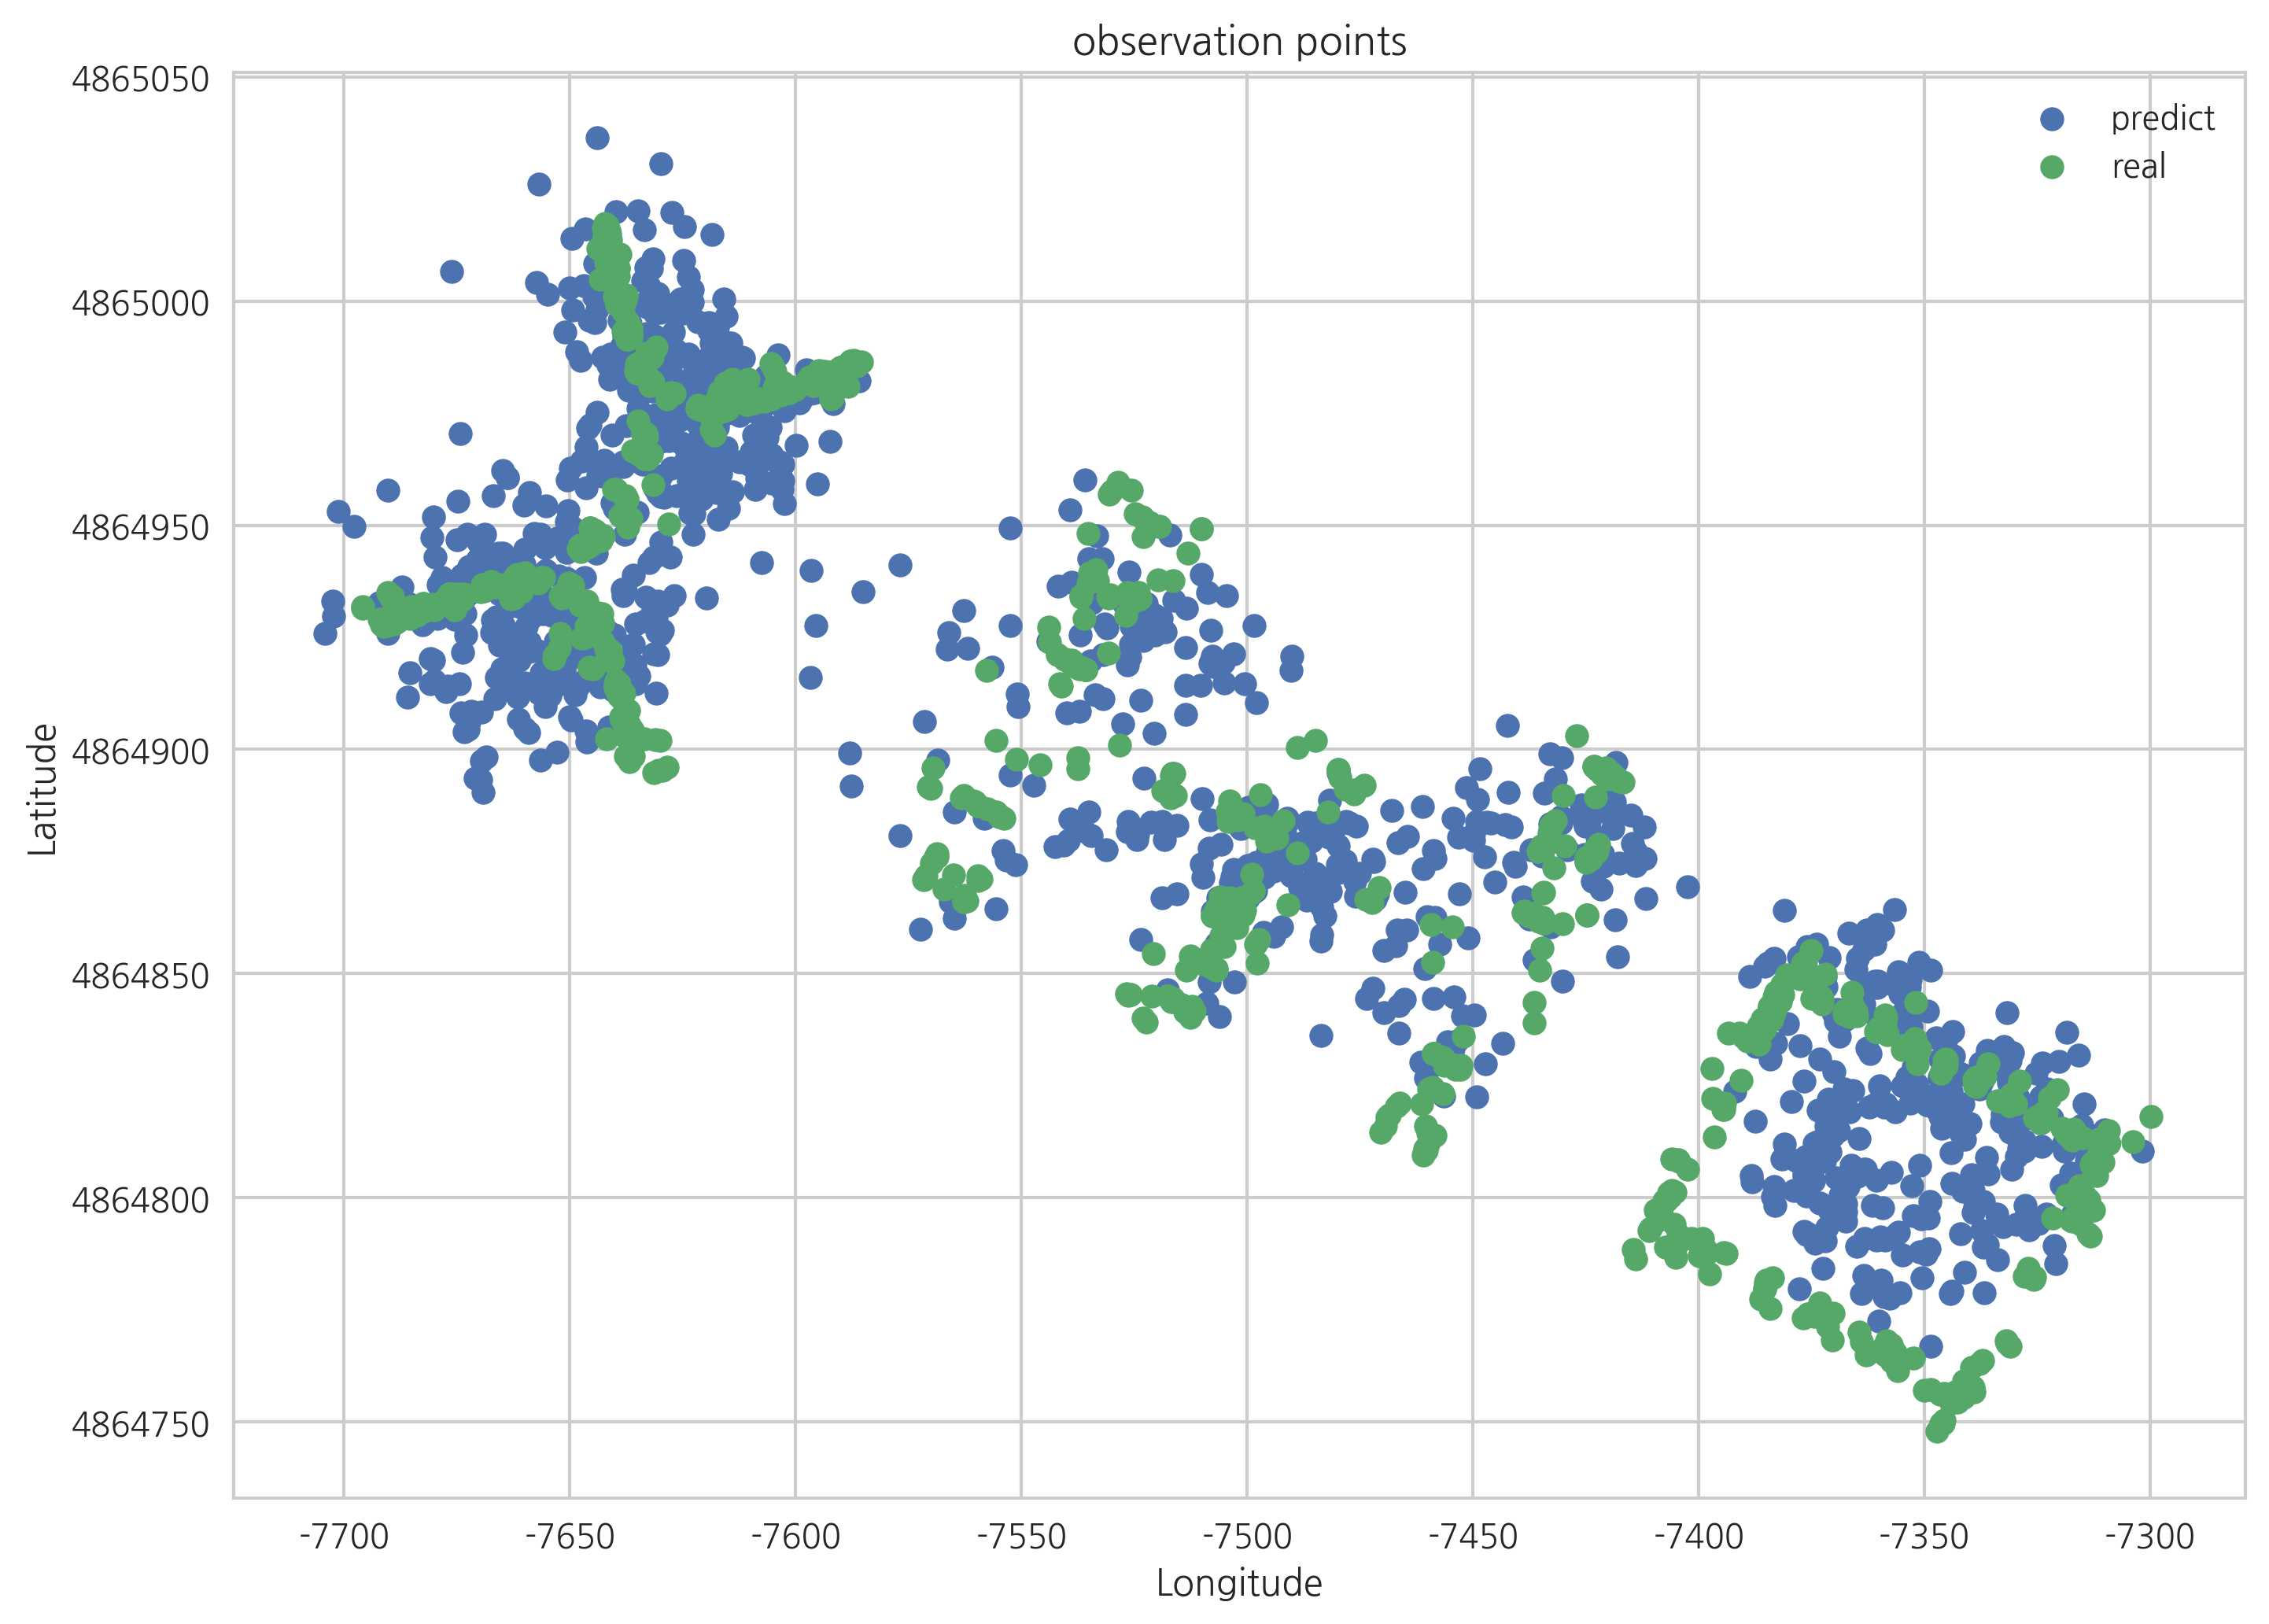

In [76]:
# Visualization_1
plt.scatter(validation_y["LONGITUDE_pre"], validation_y["LATITUDE_pre"], label = "predict")
plt.scatter(raw_validation["LONGITUDE"], raw_validation["LATITUDE"], label = "real")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("observation points")
plt.ticklabel_format(style = "plain")
plt.show()

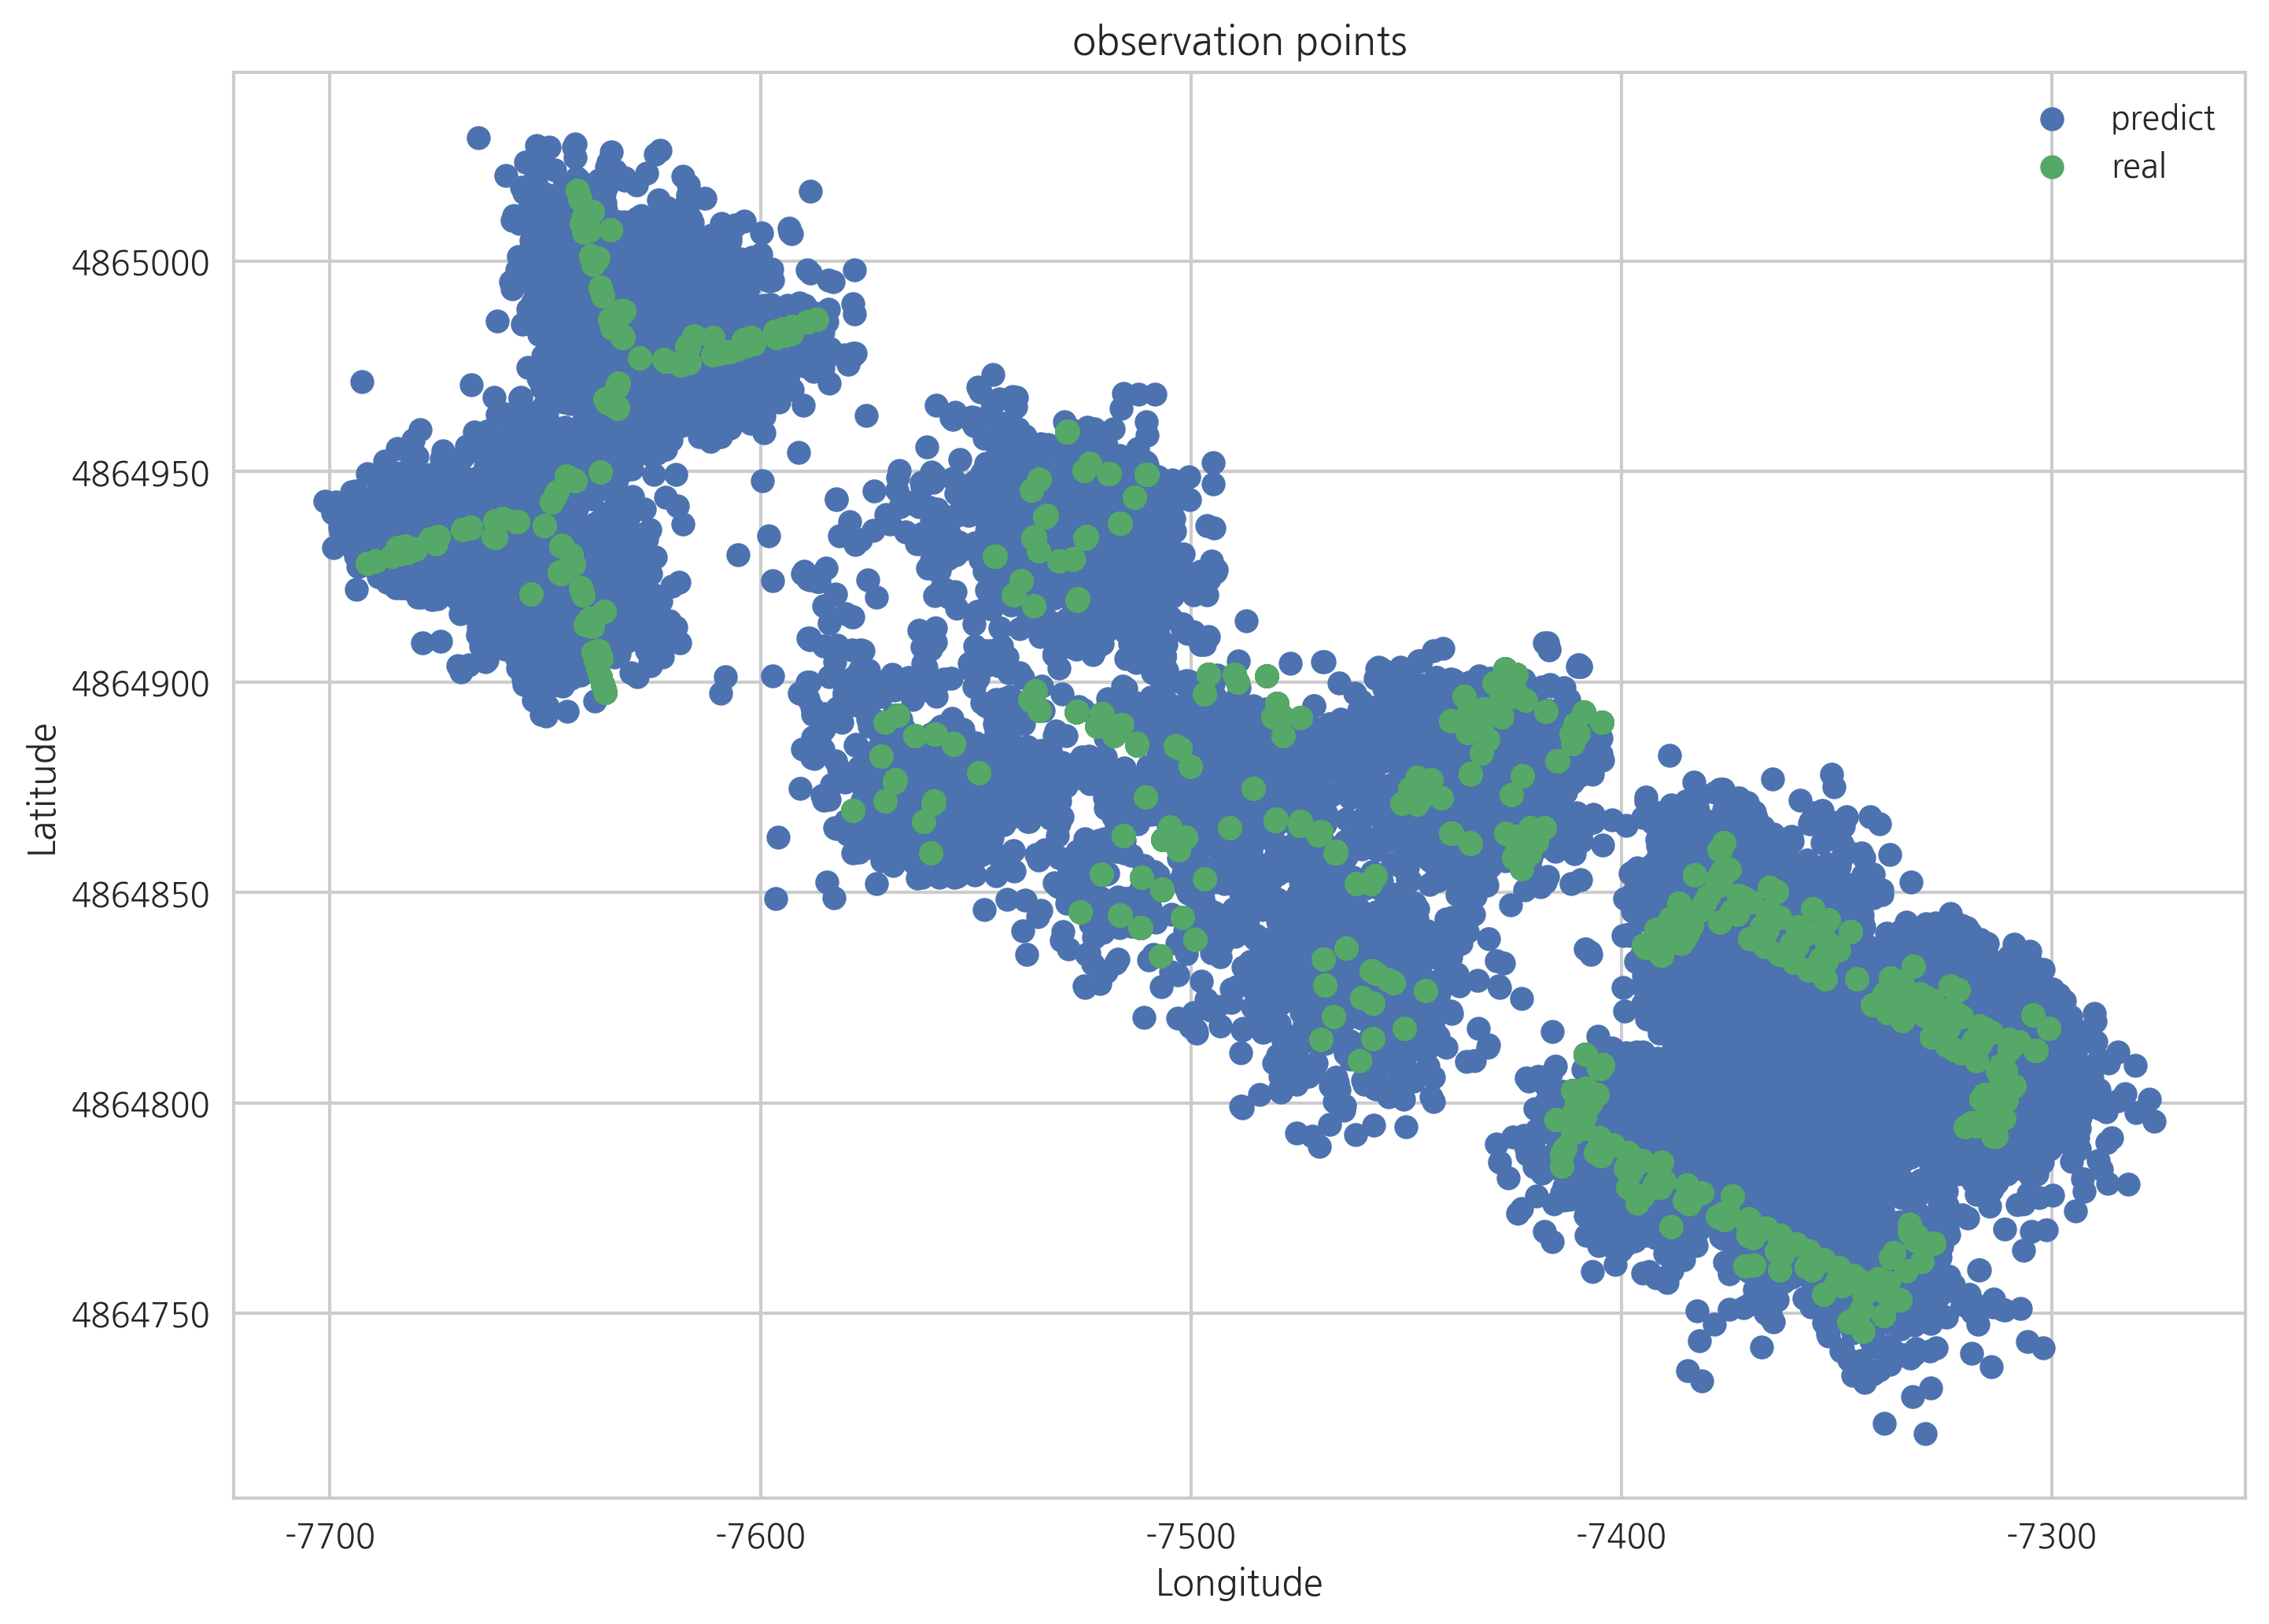

In [15]:
# Visualization_2
plt.scatter(model_1.fittedvalues.iloc[:, 0], model_1.fittedvalues.iloc[:, 1], label = "predict")
plt.scatter(raw_train["LONGITUDE"], raw_train["LATITUDE"], label = "real")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("observation points")
plt.ticklabel_format(style = "plain")
plt.show()

---

In [37]:
# classification_1(BUILDINGID)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
class_x = nor_train.loc[:, ("LONGITUDE", "LATITUDE")]
class_y = nor_train.loc[:, ("BUILDINGID")]
model_c = QuadraticDiscriminantAnalysis().fit(class_x, class_y)

In [38]:
# predict_1(BUILDINGID)
pre_x = nor_validation.loc[:, ("LONGITUDE", "LATITUDE")]
predict_y = model_c.predict(pre_x)
predict_y

array([1, 2, 2, ..., 0, 0, 0])

In [41]:
# GAP
result = pd.DataFrame(predict_y, columns=["predict"])
result["real"] = nor_validation.loc[:, "BUILDINGID"]
result["LONGITUDE"] = nor_validation.loc[:, "LONGITUDE"]
result["LATITUDE"] = nor_validation.loc[:, "LATITUDE"]
len(result[result["predict"]==result["real"]])/len(result["predict"])

1.0

In [42]:
result.head()

,predict,real,LONGITUDE,LATITUDE
0,1,1,-7515.916799,4.864890e+06
1,2,2,-7383.867221,4.864840e+06
2,2,2,-7374.302080,4.864847e+06
3,2,2,-7365.824883,4.864843e+06
4,0,0,-7641.499303,4.864922e+06


In [47]:
# classify result reporting
from sklearn.metrics import *
print(classification_report(y_true=nor_validation.loc[:, "BUILDINGID"], y_pred=predict_y))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       536
          1       1.00      1.00      1.00       307
          2       1.00      1.00      1.00       268

avg / total       1.00      1.00      1.00      1111



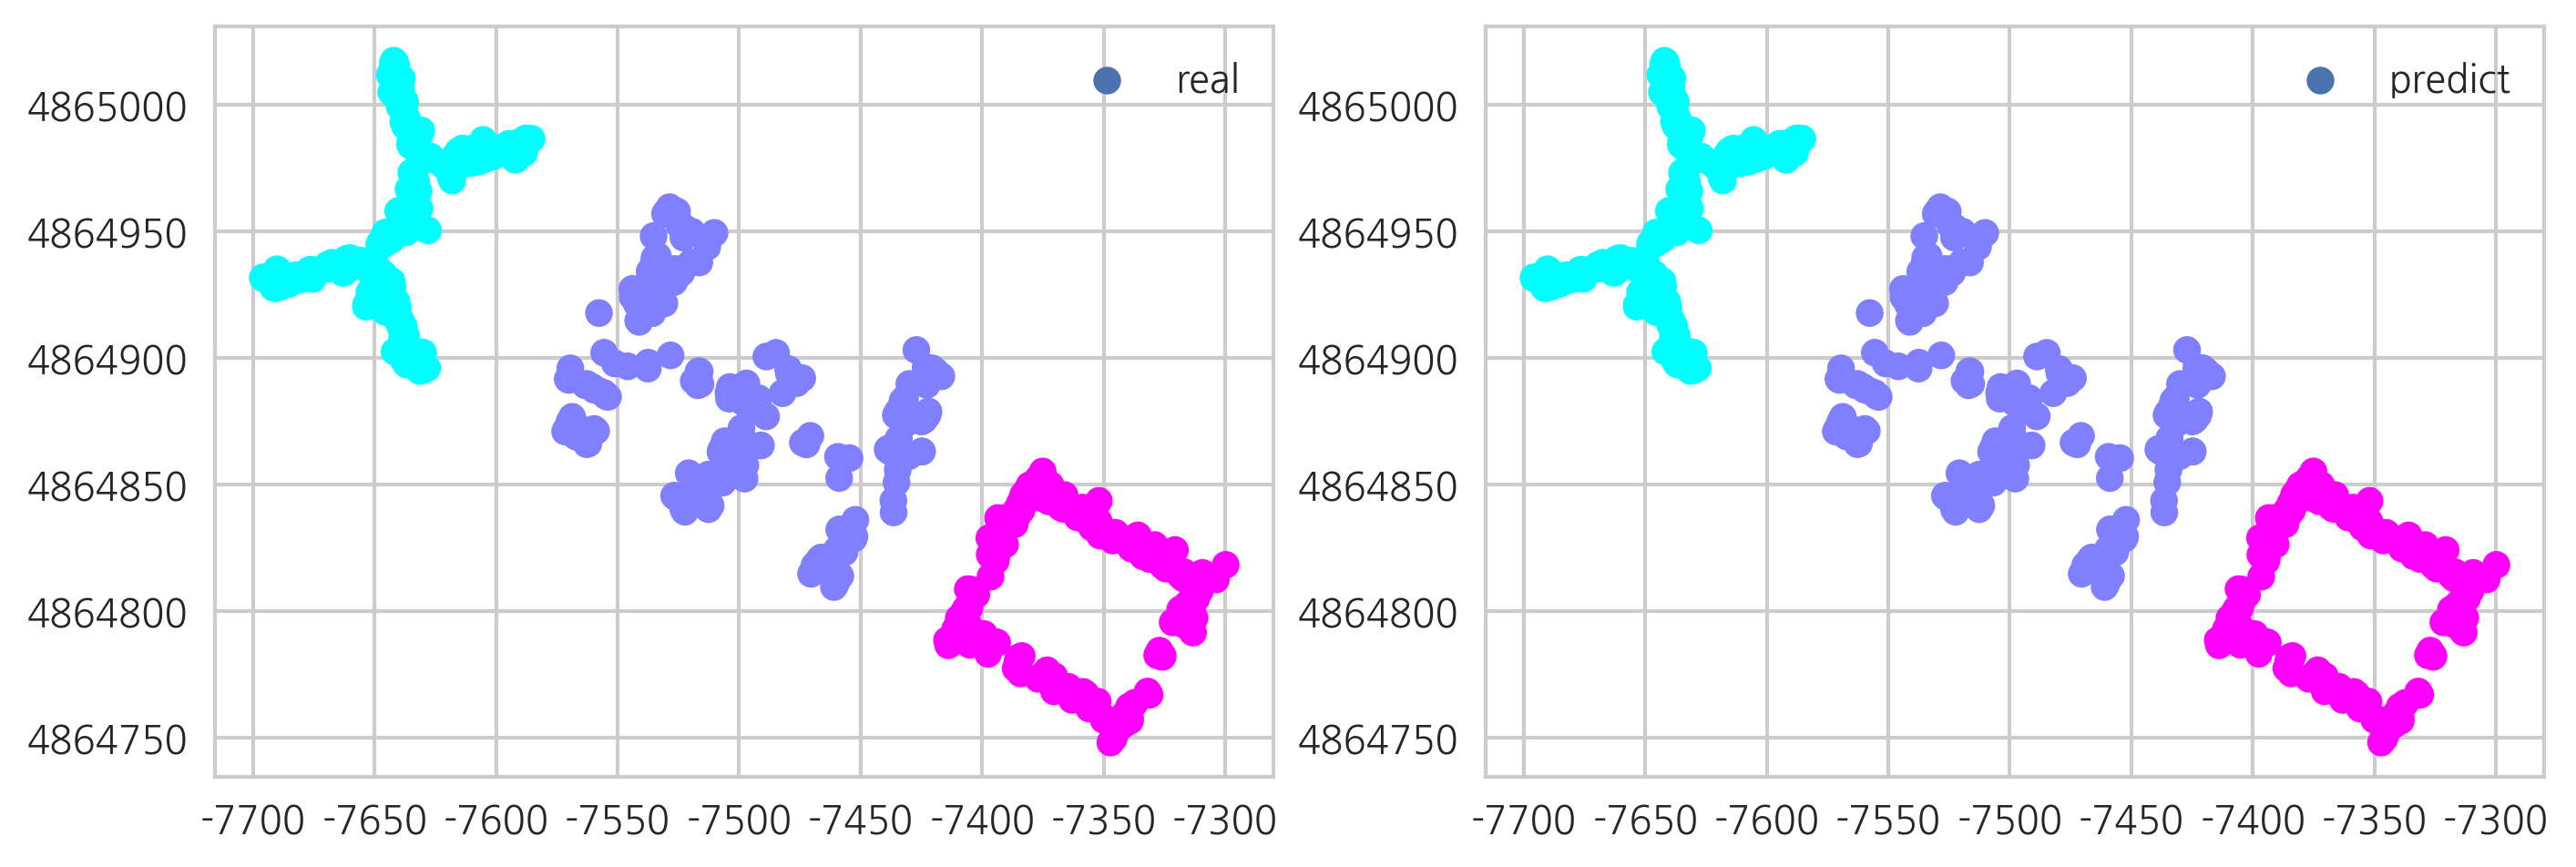

In [43]:
# Visualization
plt.subplot(221)
plt.scatter("LONGITUDE", "LATITUDE", data = result, c = "real", cmap=mpl.cm.cool, label="real")
plt.legend()
plt.subplot(222)
plt.scatter("LONGITUDE", "LATITUDE", data = result, c = "predict", cmap=mpl.cm.cool, label="predict")
plt.legend()
plt.show()

In [27]:
from ggplot import *
ggplot(aes(x='LONGITUDE', y='LATITUDE', color='label'), data=new) +\
geom_point(size=50) +\
theme_bw()

ImportError: No module named ggplot

In [28]:
# classification_2(SPACEID)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
class_x = nor_train.loc[:, ("LONGITUDE", "LATITUDE")]
class_x = class_x.join(train_c)
class_y = nor_train.loc[:, ("SPACEID")]
model_c = QuadraticDiscriminantAnalysis().fit(class_x, class_y)

/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [29]:
# predict_2(SPACEID)
pre_x = nor_validation.loc[:, ("LONGITUDE", "LATITUDE")]
pre_x = pre_x.join(validation_c)
predict_y = model_c.predict(pre_x)

/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:719: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:719: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:722: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
